In [49]:
# Import all libraries and dependencies
import pandas as pd
import os
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.figure as figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### This section is to set defualt options for pandas and other libraries

In [50]:
# Set default options for pandas and other libraries
pd.set_option('display.max_colwidth', None)

In [51]:
# Define the column names
# column_names = [
#     'Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 
#     'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
#     'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
#     'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP','Diabetes'
# ]
# Import Excel files
behavioural_raw_df = pd.read_csv("Resources/diabetes_data.csv").dropna()

In [52]:
behavioural_raw_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
behavioural_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [54]:
behavioural_raw_df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [55]:
behavioural_raw_df.dropna()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [56]:
behavioural_raw_df = behavioural_raw_df.query("Sex == 1")


In [57]:
# Create the labels set `y` and features DataFrame `X`
# generate code for feature selection Model
# Get the features (everything except the "Diabetes" column)
X = behavioural_raw_df.copy().drop(columns="Diabetes")
# filter X to only include Sex = 1

X.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Get the target column
y = behavioural_raw_df["Diabetes"].values.ravel()
y[0:5]

array([0., 0., 0., 0., 0.])

In [59]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# Create a Linear Regression model object and fit it to the training data 

import statsmodels.api as sm

lr = sm.OLS(y_train, X_train).fit() 

#

In [61]:
# Calculate the P-values for each feature using the model's summary
p_values = lr.pvalues.sort_values(ascending=False)
p_values

PhysActivity             2.901248e-01
Smoker                   1.933651e-01
MentHlth                 1.799269e-01
Stroke                   7.166901e-02
Veggies                  3.379005e-02
Fruits                   4.585811e-03
PhysHlth                 1.783665e-06
DiffWalk                 2.273596e-07
HeartDiseaseorAttack     2.938552e-08
HvyAlcoholConsump        2.542835e-16
CholCheck                1.102878e-25
HighChol                 1.086577e-63
HighBP                  4.547536e-121
BMI                     7.717099e-141
Sex                     4.534589e-173
Age                     2.305399e-200
GenHlth                 7.011446e-227
dtype: float64

In [62]:
# Use loc to filter to columns with p-values below 0.05
select_cols = p_values.loc[p_values < 0.05]

# Show the index of the results
select_cols.index

Index(['Veggies', 'Fruits', 'PhysHlth', 'DiffWalk', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'CholCheck', 'HighChol', 'HighBP', 'BMI', 'Sex',
       'Age', 'GenHlth'],
      dtype='object')

In [63]:
# Filter the features in X to include only the selected columns
X_full = X
X_sel = X[select_cols.index]

In [64]:
# split the data into training and testing sets for both the full and selected feature sets
X_full_train, X_full_test, X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_full, X_sel, y)

In [65]:
# Create Linear Regression models for both the full and selected feature sets

from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr2 = LinearRegression()

# Fit the models
lr1.fit(X_full_train, y_train)
lr2.fit(X_sel_train, y_train)

LinearRegression()

In [66]:
# Provided code to create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [67]:
# Calculate the adjusted r-squared for the full and selected feature sets
# Compare the adjusted r-squared of the two models
adj_score1 = r2_adj(X_full_test, y_test, lr1)
adj_score2 = r2_adj(X_sel_test, y_test, lr2)
print(f"1 Feature Adjusted R2: {adj_score1}")
print(f"2 Feature Adjusted R2: {adj_score2}")

1 Feature Adjusted R2: 0.2765699868768814
2 Feature Adjusted R2: 0.2770503828842056


In [68]:
# Print the coefficients of the feature model and use Recursive Feature Elimination (RFE) to select the best 5 features

# Import the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Initialize the model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
ranking = rfe.ranking_

print("Selected Features:", selected_features)
print("Feature Ranking:", ranking)

Selected Features: Index(['Sex', 'CholCheck', 'HvyAlcoholConsump', 'GenHlth', 'HighBP'], dtype='object')
Feature Ranking: [ 6  1  2  1  8 10  3  9  5 11  1  1 13 12  4  7  1]


In [69]:



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)



x_train shape: (25844, 17)
x_test shape: (6462, 17)
y_train shape: (25844,)


#

Diabetes
1.0    16935
0.0    15371
Name: count, dtype: int64


<Axes: xlabel='Diabetes'>

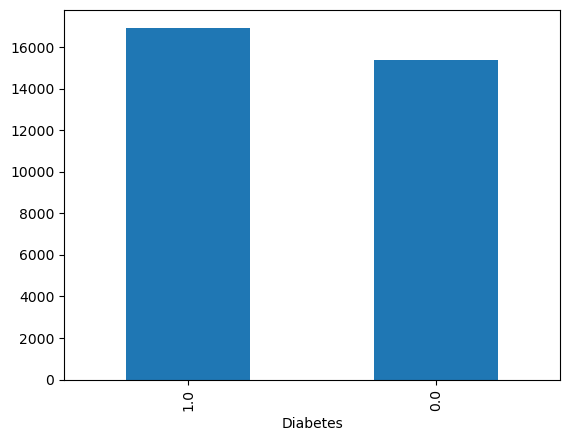

In [70]:
import pandas as pd



# Check the distribution of the target variable
class_distribution = behavioural_raw_df['Diabetes'].value_counts()
print(class_distribution)

# Plot the distribution (optional)
class_distribution.plot(kind='bar')

Sex
1.0    32306
Name: count, dtype: int64


<Axes: xlabel='Sex'>

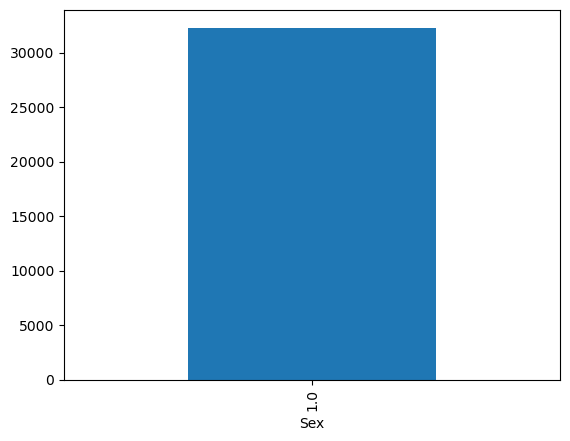

In [71]:
# Check the distribution of the target variable
class_distribution = behavioural_raw_df['Sex'].value_counts()
print(class_distribution)

# Plot the distribution (optional)
class_distribution.plot(kind='bar')

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Selected Features:", selected_features)
X_selected = X[selected_features]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Selected Features: Index(['Sex', 'CholCheck', 'HvyAlcoholConsump', 'GenHlth', 'HighBP'], dtype='object')
Accuracy: 0.6999380996595481
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.62      0.66      3075
         1.0       0.69      0.78      0.73      3387

    accuracy                           0.70      6462
   macro avg       0.70      0.70      0.70      6462
weighted avg       0.70      0.70      0.70      6462



In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.709687403280718
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.64      0.68      3075
         1.0       0.70      0.77      0.74      3387

    accuracy                           0.71      6462
   macro avg       0.71      0.71      0.71      6462
weighted avg       0.71      0.71      0.71      6462



In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_NoGender = X.drop(columns="Sex")



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_NoGender, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7081398947694212
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.64      0.68      3075
         1.0       0.70      0.77      0.73      3387

    accuracy                           0.71      6462
   macro avg       0.71      0.71      0.71      6462
weighted avg       0.71      0.71      0.71      6462



In [75]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report



# Initialize the model for feature selection
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

# Use only the selected features for the Random Forest model
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Random Forest model with the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Cross-validation score
cv_scores = cross_val_score(best_rf_model, X_selected, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Selected Features: ['Sex', 'CholCheck', 'HvyAlcoholConsump', 'GenHlth', 'HighBP']
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6999380996595481
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.62      0.66      3075
         1.0       0.69      0.78      0.73      3387

    accuracy                           0.70      6462
   macro avg       0.70      0.70      0.70      6462
weighted avg       0.70      0.70      0.70      6462

Cross-Validation Accuracy Scores: [0.70071185 0.70917815 0.68936697 0.70035598 0.70190373]
Mean Cross-Validation Accuracy: 0.7003033365778079


In [76]:
#Stroke

#HeartDiseaseorAttack


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_NoStoke_Heartdisease = X.drop(columns=["Stroke", "HeartDiseaseorAttack", "Sex"])



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_NoGender, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7081398947694212
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.64      0.68      3075
         1.0       0.70      0.77      0.73      3387

    accuracy                           0.71      6462
   macro avg       0.71      0.71      0.71      6462
weighted avg       0.71      0.71      0.71      6462



In [77]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are already defined
# Example: X = your feature matrix, y = your target variable

# Drop specific columns
X_NoStoke_Heartdisease = X.drop(columns=["Stroke", "HeartDiseaseorAttack", "Sex"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_NoStoke_Heartdisease, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(rf_model, X_NoStoke_Heartdisease, y, cv=kf, scoring='accuracy')

print(f"{k}-Fold Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean {k}-Fold Cross-Validation Accuracy:", cv_scores.mean())

Accuracy: 0.7038068709377902
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.64      0.67      3075
         1.0       0.70      0.76      0.73      3387

    accuracy                           0.70      6462
   macro avg       0.70      0.70      0.70      6462
weighted avg       0.70      0.70      0.70      6462

5-Fold Cross-Validation Accuracy Scores: [0.69900959 0.7045349  0.70902337 0.70871382 0.70592787]
Mean 5-Fold Cross-Validation Accuracy: 0.7054419127195619
